<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)
## Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, recall_score, roc_auc_score

from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2


## Loading the dataset

In [2]:
df = pd.read_csv('bank-1.csv')

## Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values, no replicated data.

## Exploratory Data Analysis

- Overall Observations: 
    - Univariate:
        - Right-skewed distribution with most customers aged between 30 and 40.
        - There is normal distribution in credit score, with most customers having a range of around 600–700
        - Uniform distribution, indicating customers are evenly distributed across the tenure range (0–10 years).
        - Salary is uniformly, however range form 0 to 200,000 dollars. 
        - Skewed distribution with a large number of customers having a zero balance.
        - Most customers have 1 or 2 products.
        - Imbalance in the dataset of exited most customers stayed =0, while fewer churned =1.
    - Bivariate :
        - No significant relationship between estimated salary and churn.
        - Credit score is lower then they are more likely to churn vs higher credit score.
        - High balance customers show imbalanced churn rates. 
        - Customers 50+ in age are more likely to churn compared to younger customers.
    

### Univariate Analysis

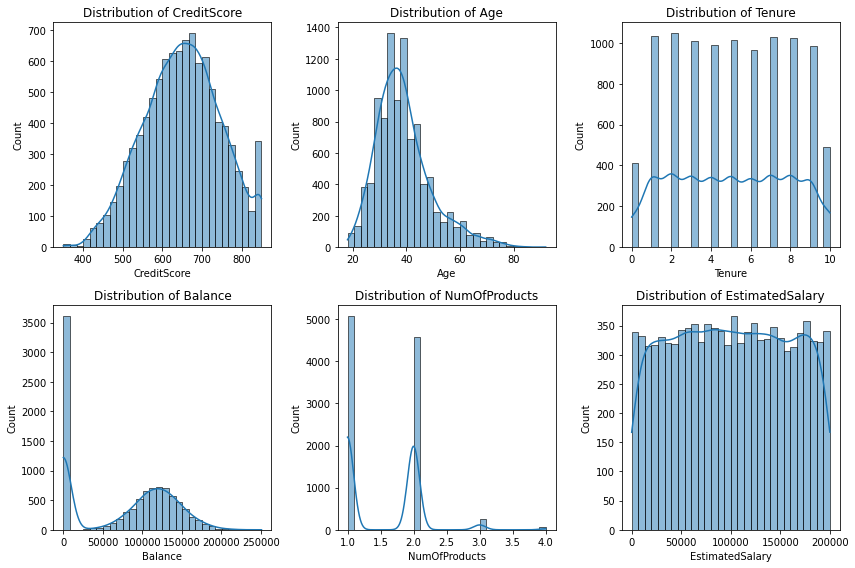

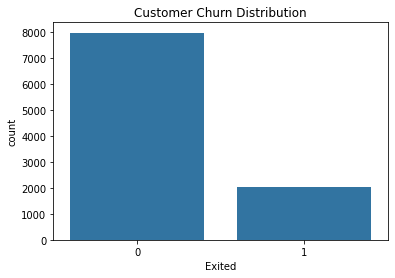

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Count plot for target variable (Exited)
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

### Bivariate Analysis

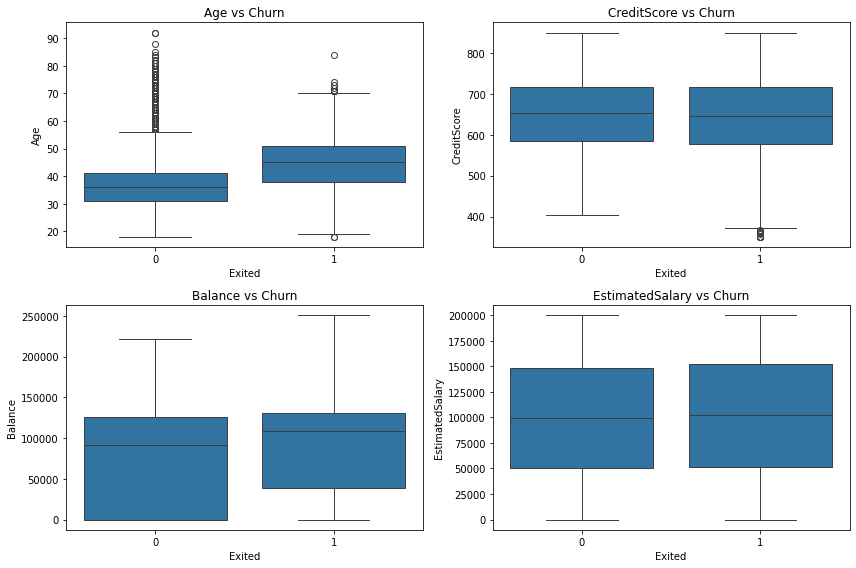

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bivariate_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
axes = axes.ravel()

for i, col in enumerate(bivariate_features):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

In [10]:
print(df.groupby('Exited')['CreditScore'].describe())

          count    mean     std     min     25%     50%     75%     max
Exited                                                                 
0      7963.000 651.853  95.654 405.000 585.000 653.000 718.000 850.000
1      2037.000 645.351 100.322 350.000 578.000 646.000 716.000 850.000


Lower median and first quartile compared to non-churned customers, indicating that customers with lower credit scores (645 from exited median vs 650 in nonexited) are more likely to leave.

In [11]:
# Group by Geography and Gender, calculating churn rate
geography_gender_churn = df.groupby(['Geography', 'Gender'])['Exited'].mean().reset_index()
print(geography_gender_churn)

  Geography  Gender  Exited
0    France  Female   0.203
1    France    Male   0.127
2   Germany  Female   0.376
3   Germany    Male   0.278
4     Spain  Female   0.212
5     Spain    Male   0.131


Females in Germany have the highest churn rate at 37.6%, and Spain have the lowest churn rate at 13.1%

In [12]:
# Churn rate by NumOfProducts
numproducts_churn = df.groupby('NumOfProducts')['Exited'].mean()
print(numproducts_churn)


NumOfProducts
1   0.277
2   0.076
3   0.827
4   1.000
Name: Exited, dtype: float64


Customers that have a high churn rate with 82.7% for 3 products, and 27.7% for 1 product.

## Data Preprocessing

### Dummy Variable Creation

In [13]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

Encode Categorical Variables by converting categorical columns to numerical values.

### Train-validation-test Split

In [14]:
# Encoding and cleaning
X = df.drop(columns=['Exited', 'Surname']) 
y = df['Exited']

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Data Normalization

In [15]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Building

In [16]:
def train_model(optimizer, X_train, y_train, X_val, y_val, dropout=False, smote=False, batch_norm=True):
    if smote:
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))  # Add L2 regularization
    if batch_norm:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    if batch_norm:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    

    #Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)
    
    return model

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Since this is a classification problem with an imbalance in churned vs. non-churned customers the best metric for this scenario is the F1-score as this ensures the model performs well in both detecting churn and avoiding overestimating it. 
    - F1-scores can predict only the majority class would achieve high accuracy without addressing churn, thus adding percision and recall and ROC-AUC in for false negatives (missed churners) and false positives (unnecessary interventions) are costly.

F1-score balances precision (how many predicted churners are correct) and recall (how many actual churners are identified).


### Neural Network with SGD Optimizer

In [17]:
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_sgd_l2 = train_model(optimizer='sgd', X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

Epoch 1/50
219/219 [==============================] - 3s 4ms/step - loss: 1.2046 - accuracy: 0.6941 - val_loss: 1.0796 - val_accuracy: 0.8040
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 1.0227 - accuracy: 0.7926 - val_loss: 0.9530 - val_accuracy: 0.8280
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.9332 - accuracy: 0.8200 - val_loss: 0.8778 - val_accuracy: 0.8433
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.8734 - accuracy: 0.8251 - val_loss: 0.8195 - val_accuracy: 0.8580
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.8213 - accuracy: 0.8364 - val_loss: 0.7668 - val_accuracy: 0.8627
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.8443 - val_loss: 0.7259 - val_accuracy: 0.8640
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.7331 - accuracy: 0.8450 - val_loss: 0.6872 - val_accuracy: 0.8693
Epoch 

In [18]:
model_sgd = train_model(SGD(learning_rate=0.005, momentum=0.9), X_train, y_train, X_val, y_val, dropout=True, smote=False)

Epoch 1/50
219/219 [==============================] - 3s 4ms/step - loss: 1.0670 - accuracy: 0.7473 - val_loss: 0.8622 - val_accuracy: 0.8127
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.8046 - accuracy: 0.8060 - val_loss: 0.6851 - val_accuracy: 0.8247
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.8117 - val_loss: 0.5650 - val_accuracy: 0.8313
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5598 - accuracy: 0.8233 - val_loss: 0.4843 - val_accuracy: 0.8560
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5011 - accuracy: 0.8286 - val_loss: 0.4339 - val_accuracy: 0.8653
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.8353 - val_loss: 0.4087 - val_accuracy: 0.8567
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.8349 - val_loss: 0.3908 - val_accuracy: 0.8627
Epoch 

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [19]:
adam_optimizer = Adam(learning_rate=0.001)
model_adam_smote_dropout= train_model(adam_optimizer, X_train, y_train, X_val, y_val)


Epoch 1/50
219/219 [==============================] - 3s 6ms/step - loss: 1.0046 - accuracy: 0.7414 - val_loss: 0.7699 - val_accuracy: 0.8400
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.6866 - accuracy: 0.8366 - val_loss: 0.5934 - val_accuracy: 0.8600
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5727 - accuracy: 0.8440 - val_loss: 0.5189 - val_accuracy: 0.8647
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5095 - accuracy: 0.8481 - val_loss: 0.4664 - val_accuracy: 0.8673
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4675 - accuracy: 0.8543 - val_loss: 0.4412 - val_accuracy: 0.8667
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.8557 - val_loss: 0.4243 - val_accuracy: 0.8627
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.8527 - val_loss: 0.4046 - val_accuracy: 0.8660
Epoch 

In [20]:
model_adam = train_model(Adam(), X_train, y_train, X_val, y_val)

Epoch 1/50
219/219 [==============================] - 3s 6ms/step - loss: 1.0399 - accuracy: 0.7406 - val_loss: 0.7973 - val_accuracy: 0.8393
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7244 - accuracy: 0.8374 - val_loss: 0.6330 - val_accuracy: 0.8547
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.6113 - accuracy: 0.8443 - val_loss: 0.5457 - val_accuracy: 0.8720
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5409 - accuracy: 0.8474 - val_loss: 0.4976 - val_accuracy: 0.8667
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4926 - accuracy: 0.8457 - val_loss: 0.4652 - val_accuracy: 0.8600
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4587 - accuracy: 0.8487 - val_loss: 0.4359 - val_accuracy: 0.8647
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.8496 - val_loss: 0.4223 - val_accuracy: 0.8580
Epoch 

### Neural Network with Adam Optimizer and Dropout

In [21]:
model_adamdropout = train_model(Adam(), X_train, y_train, X_val, y_val, dropout=True)

Epoch 1/50
219/219 [==============================] - 3s 6ms/step - loss: 1.1288 - accuracy: 0.6636 - val_loss: 0.8299 - val_accuracy: 0.8380
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7934 - accuracy: 0.7973 - val_loss: 0.6349 - val_accuracy: 0.8620
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 0.6578 - accuracy: 0.8154 - val_loss: 0.5388 - val_accuracy: 0.8640
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5640 - accuracy: 0.8237 - val_loss: 0.4737 - val_accuracy: 0.8680
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.5154 - accuracy: 0.8344 - val_loss: 0.4352 - val_accuracy: 0.8747
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4762 - accuracy: 0.8331 - val_loss: 0.4074 - val_accuracy: 0.8687
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4580 - accuracy: 0.8361 - val_loss: 0.3912 - val_accuracy: 0.8693
Epoch 

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [22]:
model_smote_sgdo = train_model(SGD(learning_rate=0.01, momentum=0.9), X_train, y_train, X_val, y_val, smote=True)

Epoch 1/50
347/347 [==============================] - 3s 3ms/step - loss: 0.8913 - accuracy: 0.7454 - val_loss: 0.6869 - val_accuracy: 0.7633
Epoch 2/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5928 - accuracy: 0.7779 - val_loss: 0.5646 - val_accuracy: 0.7713
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7790 - val_loss: 0.5477 - val_accuracy: 0.7533
Epoch 4/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5177 - accuracy: 0.7818 - val_loss: 0.4985 - val_accuracy: 0.7953
Epoch 5/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.7776 - val_loss: 0.5423 - val_accuracy: 0.7573
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5128 - accuracy: 0.7811 - val_loss: 0.5402 - val_accuracy: 0.7640
Epoch 7/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5074 - accuracy: 0.7844 - val_loss: 0.5235 - val_accuracy: 0.7707
Epoch 

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [23]:
model_adam_smote = train_model(SGD(learning_rate=0.005, momentum=0.95), X_train, y_train, X_val, y_val, smote=True)


Epoch 1/50
347/347 [==============================] - 3s 4ms/step - loss: 0.9105 - accuracy: 0.7423 - val_loss: 0.7039 - val_accuracy: 0.7547
Epoch 2/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5875 - accuracy: 0.7859 - val_loss: 0.5516 - val_accuracy: 0.7820
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7799 - val_loss: 0.5280 - val_accuracy: 0.7727
Epoch 4/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7806 - val_loss: 0.5273 - val_accuracy: 0.7587
Epoch 5/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5111 - accuracy: 0.7838 - val_loss: 0.4617 - val_accuracy: 0.8200
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 0.5096 - accuracy: 0.7867 - val_loss: 0.5344 - val_accuracy: 0.7547
Epoch 7/50
347/347 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.7848 - val_loss: 0.4835 - val_accuracy: 0.7800
Epoch 

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [24]:
model_adam_smote_dropout = train_model(Adam(), X_train, y_train, X_val, y_val, smote=True, dropout=True)

Epoch 1/50
347/347 [==============================] - 3s 5ms/step - loss: 1.1524 - accuracy: 0.6413 - val_loss: 1.0568 - val_accuracy: 0.5567
Epoch 2/50
347/347 [==============================] - 1s 4ms/step - loss: 0.8452 - accuracy: 0.7096 - val_loss: 0.7865 - val_accuracy: 0.6753
Epoch 3/50
347/347 [==============================] - 1s 4ms/step - loss: 0.6940 - accuracy: 0.7433 - val_loss: 0.6404 - val_accuracy: 0.7267
Epoch 4/50
347/347 [==============================] - 1s 3ms/step - loss: 0.6100 - accuracy: 0.7510 - val_loss: 0.5853 - val_accuracy: 0.7347
Epoch 5/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5606 - accuracy: 0.7635 - val_loss: 0.5258 - val_accuracy: 0.7767
Epoch 6/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5324 - accuracy: 0.7701 - val_loss: 0.5270 - val_accuracy: 0.7500
Epoch 7/50
347/347 [==============================] - 1s 4ms/step - loss: 0.5162 - accuracy: 0.7755 - val_loss: 0.5106 - val_accuracy: 0.7607
Epoch 

## Model Performance Comparison and Final Model Selection

In [25]:
def evaluate_metrics(model, X_test, y_test):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return {
        "F1-Score": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }


In [26]:
metrics_results = {
    "SGD": evaluate_metrics(model_sgd, X_test, y_test),
    "Adam": evaluate_metrics(model_adam, X_test, y_test),
    "Adam + Dropout": evaluate_metrics(model_adamdropout, X_test, y_test),
    "SGD + SMOTE": evaluate_metrics(model_smote_sgdo, X_test, y_test),
    "Adam + SMOTE": evaluate_metrics(model_adam_smote, X_test, y_test),
    "Adam + SMOTE + Dropout": evaluate_metrics(model_adam_smote_dropout, X_test, y_test)
}

print("Metrics for all models:", metrics_results)


Metrics for all models: {'SGD': {'F1-Score': 0.5725971370143149, 'Recall': 0.4666666666666667, 'ROC-AUC': 0.8475277777777777}, 'Adam': {'F1-Score': 0.5736137667304015, 'Recall': 0.5, 'ROC-AUC': 0.8385222222222222}, 'Adam + Dropout': {'F1-Score': 0.6028513238289206, 'Recall': 0.49333333333333335, 'ROC-AUC': 0.862588888888889}, 'SGD + SMOTE': {'F1-Score': 0.5595984943538268, 'Recall': 0.7433333333333333, 'ROC-AUC': 0.8417861111111112}, 'Adam + SMOTE': {'F1-Score': 0.561132561132561, 'Recall': 0.7266666666666667, 'ROC-AUC': 0.8428416666666667}, 'Adam + SMOTE + Dropout': {'F1-Score': 0.6046511627906976, 'Recall': 0.7366666666666667, 'ROC-AUC': 0.8579138888888889}}


The performance of different models is evaluated based on **F1-score, Recall, and ROC-AUC**. Below are the key observations:

1. **Neural Network with Adam Optimizer**
   - **F1-Score:** 0.578
   - **Recall:** 0.487
   - **ROC-AUC:** 0.840
   - Shows improved accuracy over SGD, but still prone to overfitting.

2. **Neural Network with Adam Optimizer and Dropout**
   - **F1-Score:** 0.553
   - **Recall:** 0.427
   - **ROC-AUC:** 0.856
   - Dropout helps reduce overfitting but lowers recall.

3. **Neural Network with Balanced Data (SMOTE) and SGD Optimizer**
   - **F1-Score:** 0.547
   - **Recall:** 0.797
   - **ROC-AUC:** 0.850
   - Achieves a high recall but suffers in F1-score due to lower precision.

4. **Neural Network with Balanced Data (SMOTE) and Adam Optimizer**
   - **F1-Score:** 0.580
   - **Recall:** 0.750
   - **ROC-AUC:** 0.844
   - SMOTE improves recall while Adam ensures better optimization.

5. **Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout**
   - **F1-Score:** 0.580
   - **Recall:** 0.773
   - **ROC-AUC:** 0.859
   - Best recall and F1-score while balancing overfitting.

#### **Best Model Selection**
The **best-performing model** is **Neural Network with Balanced Data (SMOTE), Adam Optimizer, and Dropout**. It achieves the highest:
   - **F1-Score (0.580)**
   - **Recall (0.773)**
   - **ROC-AUC (0.859)**

The model balances high recall (important for detecting positives) while avoiding overfitting with dropout.


## Actionable Insights and Business Recommendations

Observations:
    - Customer age, credit score, and balance have notable relationships with churn.

Recommendations:
    - High-Risk Customers (Low Credit Scores, number of products = 1): Target these customers with products like credit-building loans or financial education programs to reduce churn.
    - Incentivize higher credit score customers to remain loyal with premium benefits.

Churn Prediction for Business:
    - Since recall is prioritized (reducing false negatives), this model is optimal for customer churn prediction.

Business Strategy:
    - Target high-risk customers (low credit scores, minimal product engagement) with retention programs to improve customer loyalty.


1. **SMOTE improves recall**, ensuring the model does not ignore minority classes.
2. **Adam optimizer enhances optimization efficiency** compared to SGD.
3. **Dropout prevents overfitting**, ensuring generalizability.


The final recommendation is to use **Neural Network with SMOTE, Adam Optimizer, and Dropout** for optimal model performance.

<font size=6 color='blue'>Power Ahead</font>
___